In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [4]:
heart_raw = pd.read_csv('heart.csv')
heart_raw

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Data Preprocessing

In [23]:
heart_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
heart_features = heart_raw.copy()
heart_features = heart_features.drop(['HeartDisease'], axis=1)
targets = heart_raw['HeartDisease']

In [ ]:
# One-hot Encoding

heart_features = pd.get_dummies(heart_features, drop_first=True)
heart_features

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [13]:
heart_features.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
# Standardization

scaler = StandardScaler()
heart_features_scaled = scaler.fit_transform(heart_features)
heart_features_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  1.21424608,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.8235563 ,
        -1.00218103,  1.15067399]])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(heart_features_scaled, targets, test_size=0.2, random_state=42)

## Decision Tree

### Find the best max depth

In [58]:
maxDepth = range(1,21)
tree_acc = []

for depth in maxDepth:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)

    clf = clf.fit(x_train,y_train)

    y_pred = clf.predict(x_test)

    tree_acc.append({
        'max_depth': depth,
        'acc': accuracy_score(y_test, y_pred)
    })

In [61]:
tree_acc = pd.DataFrame(tree_acc)

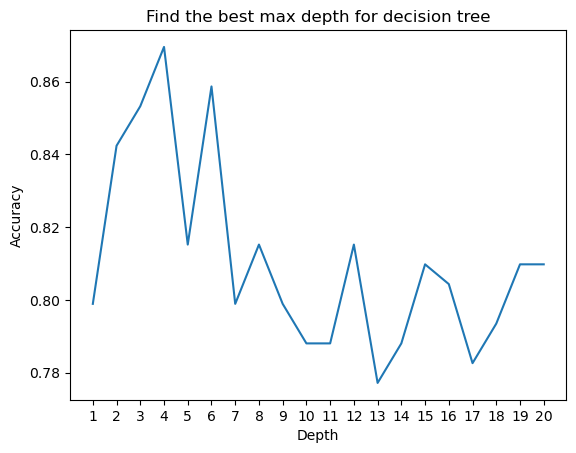

In [63]:
sns.lineplot(x=maxDepth, y=tree_acc['acc'])

plt.title('Find the best max depth for decision tree')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(maxDepth)
plt.show()

### Apply k = 4

In [35]:
best_clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

best_clf = best_clf.fit(x_train,y_train)

best_y_pred = best_clf.predict(x_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, best_y_pred)}")

Accuracy: 0.8695652173913043
F1 Score: 0.8878504672897196


## KNN

### Find the best k for KNN

In [51]:
k_values = range(1, 21)
k_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    k_pred = knn.predict(x_test)
    
    k_acc.append({
        'k': k,
        'acc': accuracy_score(y_test, k_pred)
    })

In [56]:
k_acc = pd.DataFrame(k_acc)
k_acc[k_acc['acc'] == k_acc['acc'].max()]

,k,acc
6,7,0.896739
14,15,0.896739


([<matplotlib.axis.XTick at 0x17a0c1010>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

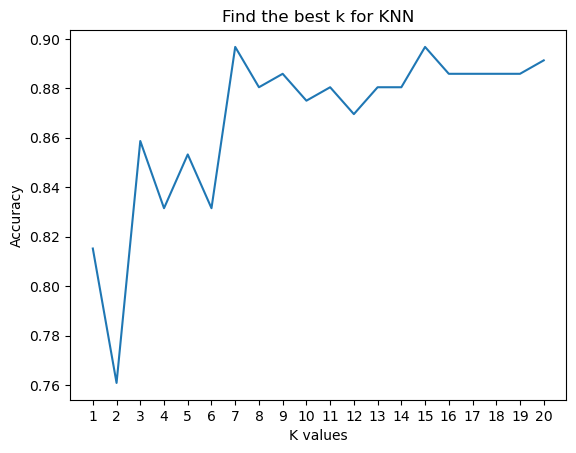

In [57]:
sns.lineplot(x=k_values, y=k_acc['acc'])

plt.title('Find the best k for KNN')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.xticks(k_values)

## Apply k = 7

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=7)
best_knn.fit(x_train, y_train)
best_knn_pred = best_knn.predict(x_test)

print(F"Accuracy: {accuracy_score(y_test, best_knn_pred)}")

Accuracy: 0.8967391304347826
F1 Score: 0.9107981220657277


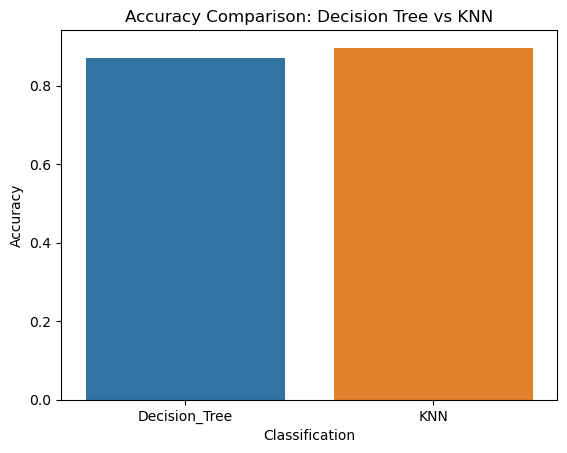

In [70]:
type = ['Decision_Tree', 'KNN']
type_acc = [accuracy_score(y_test, best_y_pred) ,accuracy_score(y_test, best_knn_pred)]

sns.barplot(x=type, y=type_acc, hue=type)
plt.title('Accuracy Comparison: Decision Tree vs KNN')
plt.xlabel('Classification')
plt.ylabel('Accuracy')
plt.show()